In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\Data\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df['Glucose'].replace(0, np.nan, inplace=True)
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['Insulin'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)
df.drop(['SkinThickness' ,'Insulin'], axis=1, inplace=True)
df = df.dropna(axis=0)

In [4]:


cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome']

df_outcome_1 = df[df['Outcome'] == 1].copy()
i = len(df_outcome_1)
df_outcome_0 = df[df['Outcome'] == 0].sample(i, random_state=1)
df_balanced = df_outcome_0.append(df_outcome_1)
df_balanced = df[cols]
df_balanced

C:\Users\divya\AppData\Local\Temp\ipykernel_8324\3948934852.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_outcome_0.append(df_outcome_1)


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [5]:
y = df_balanced['Outcome']
X = df_balanced.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , stratify=y, random_state=1)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(579, 6), y:(579,)
Shape test set: X:(145, 6), y:(145,)


In [6]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.41%
_______________________________________________
F1 Score: 0.64
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.797203    0.746667  0.784111    0.771935      0.779834
recall       0.900000    0.562814  0.784111    0.731407      0.784111
f1-score     0.845488    0.641834  0.784111    0.743661      0.775493
support    380.000000  199.000000  0.784111  579.000000    579.000000
_______________________________________________
Confusion Matrix: 
 [[342  38]
 [ 87 112]]


Test Result:
Accuracy Score: 69.66%
_______________________________________________
F1 Score: 0.49
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.733945   0.583333  0.696552    0.658639      0.682010
recall      0.842105   0.420000  0.696552    0.631053      0.696552
f1-score    

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    380.0  199.0       1.0      579.0         579.0
_______________________________________________
Confusion Matrix: 
 [[380   0]
 [  0 199]]


Test Result:
Accuracy Score: 69.66%
_______________________________________________
F1 Score: 0.58
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.780220   0.555556  0.696552    0.667888      0.702749
recall      0.747368   0.600000  0.696552    0.673684      0.696552
f1-score    0.763441   0.576923  0.696552    0.670182      0.699124

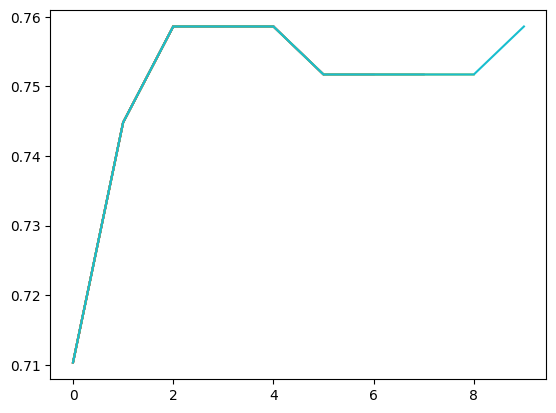

In [9]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
    plt.plot(accuracy_scores)

In [10]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    380.0  199.0       1.0      579.0         579.0
_______________________________________________
Confusion Matrix: 
 [[380   0]
 [  0 199]]


Test Result:
Accuracy Score: 73.79%
_______________________________________________
F1 Score: 0.61
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.793814   0.625000  0.737931    0.709407      0.735603
recall      0.810526   0.600000  0.737931    0.705263      0.737931
f1-score    0.802083   0.612245  0.737931    0.707164      0.736622

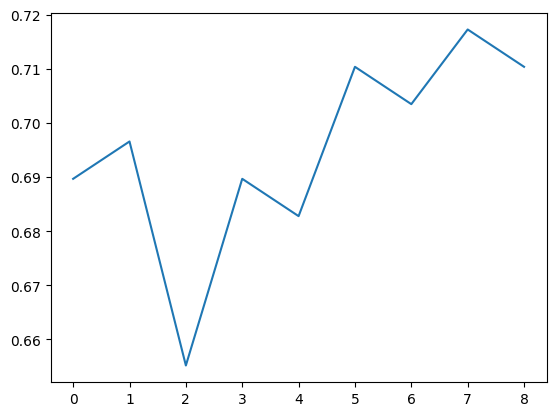

In [11]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [12]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.00%
_______________________________________________
F1 Score: 0.7
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.826087    0.769697  0.810017    0.797892      0.806706
recall       0.900000    0.638191  0.810017    0.769095      0.810017
f1-score     0.861461    0.697802  0.810017    0.779632      0.805212
support    380.000000  199.000000  0.810017  579.000000    579.000000
_______________________________________________
Confusion Matrix: 
 [[342  38]
 [ 72 127]]

Test Result:
Accuracy Score: 71.03%
_______________________________________________
F1 Score: 0.53
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.752381   0.600000  0.710345    0.676190      0.699836
recall      0.831579   0.480000  0.710345    0.655789      0.710345
f1-score    0.

In [13]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

In [14]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

In [15]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

In [16]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

In [17]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.41,69.66
Decision Tree Classifier,100.00,69.66
Random Forest Classifier,100.00,73.79
K-Nearest Neighbor,81.00,71.03


In [19]:

y_pred = rfc.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

joblib.dump(rfc,r"C:\\Users\\divya\\OneDrive\\Desktop\\HealthCareApp\\HealthCareApp\\diabetesApi\\diabetes.pkl")

Accuracy : 0.7379310344827587
Classification report
---------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.62      0.60      0.61        50

    accuracy                           0.74       145
   macro avg       0.71      0.71      0.71       145
weighted avg       0.74      0.74      0.74       145

_____________________


['C:\\\\Users\\\\divya\\\\OneDrive\\\\Desktop\\\\HealthCareApp\\\\HealthCareApp\\\\diabetesApi\\\\diabetes.pkl']